# Electronic albums
## An Exploratory Data Analysis and Modeling
### Data scraped from Spotify (Studio Albums)

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np 

In [2]:
# Read data from CSV file
df = pd.read_csv("electronic.csv")

In [3]:
df.shape

(690, 23)

In [4]:
# Remove everything after the first comma in the 'Artists' column
df['Artists'] = df['Artists'].str.split(',').str[0]



In [5]:
# Converting Release Date (Object Dtype) column to datetime Dtype
df['Release Date'] = pd.to_datetime(df['Release Date'], format='mixed')

# Extract numerical features from datetime columns
df['Release Day'] = df['Release Date'].dt.day
df['Release Month'] = df['Release Date'].dt.month
df['Release Year'] = df['Release Date'].dt.year

# milliseconds into minutes
df['duration_minutes'] = df['duration_ms'] / 60000

#Removing duration_ms column
df.drop(columns=['duration_ms'], inplace=True)

In [6]:
# Sort the DataFrame by 'Popularity Score' in descending order
df_sorted = df.sort_values(by='Popularity Score', ascending=False)

# Drop duplicates in the 'Name' column, keeping the first occurrence (highest popularity score)
df_unique = df_sorted.drop_duplicates(subset='Name', keep='first')

# Reset index to ensure the DataFrame index is sequential
df_unique = df_unique.reset_index(drop=True)

# Display the resulting DataFrame without duplicate 'Name' entries
print(df_unique)

                                              Name        Artists  \
0                                       Wake Me Up         Avicii   
1                                           Summer  Calvin Harris   
2                   Outside (feat. Ellie Goulding)  Calvin Harris   
3                       Feel So Close - Radio Edit  Calvin Harris   
4                                 Waiting For Love         Avicii   
..                                             ...            ...   
499                                      Dangerous   David Guetta   
500   Ready for the Weekend - Dave Spoon Dub Remix  Calvin Harris   
501  Just Be - Wally Lopez La Factoria Vocal Remix         Tiësto   
502                                Vault Character  Calvin Harris   
503                                       On / Off      Daft Punk   

                     Album Release Date  Popularity Score  danceability  \
0                     True   2013-01-01                86         0.532   
1                   M

In [7]:
# Rename column 'Popularity Score' to 'popularity' so it matches my audio features by just having single words on columns
df_unique = df_unique.rename(columns={'Popularity Score': 'popularity'})

# Display the DataFrame with the renamed column
print("\nDataFrame with Renamed Column:")
print(df_unique)


DataFrame with Renamed Column:
                                              Name        Artists  \
0                                       Wake Me Up         Avicii   
1                                           Summer  Calvin Harris   
2                   Outside (feat. Ellie Goulding)  Calvin Harris   
3                       Feel So Close - Radio Edit  Calvin Harris   
4                                 Waiting For Love         Avicii   
..                                             ...            ...   
499                                      Dangerous   David Guetta   
500   Ready for the Weekend - Dave Spoon Dub Remix  Calvin Harris   
501  Just Be - Wally Lopez La Factoria Vocal Remix         Tiësto   
502                                Vault Character  Calvin Harris   
503                                       On / Off      Daft Punk   

                     Album Release Date  popularity  danceability  energy  \
0                     True   2013-01-01          86         0.

In [8]:
# Checking averages on my numerical colums
mean_values_of_features = df_unique.groupby('Artists')[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
                                                 'speechiness', 'acousticness', 'instrumentalness',
                                                 'liveness', 'valence', 'tempo', 'duration_minutes',
                                                 'time_signature', 'Release Day', 'Release Month',
                                                 'Release Year']].mean()
print(mean_values_of_features)

                       popularity  danceability    energy       key  loudness  \
Artists                                                                         
Avicii                  55.638889      0.604028  0.695639  6.055556 -5.495806   
Calvin Harris           41.708333      0.676486  0.747016  5.805556 -5.326875   
Daft Punk               51.018868      0.700906  0.653453  6.301887 -9.245000   
David Guetta            26.587156      0.658229  0.740569  5.834862 -5.760321   
The Chemical Brothers   35.880734      0.586601  0.781017  4.688073 -6.570156   
Tiësto                  28.992000      0.651784  0.781184  5.272000 -6.858880   

                           mode  speechiness  acousticness  instrumentalness  \
Artists                                                                        
Avicii                 0.555556     0.070158      0.142366          0.029014   
Calvin Harris          0.444444     0.066192      0.169402          0.247855   
Daft Punk              0.528302

In [9]:
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats

Mean values of features sorted in descending order:
Artists
Avicii                   55.638889
Daft Punk                51.018868
Calvin Harris            41.708333
The Chemical Brothers    35.880734
Tiësto                   28.992000
David Guetta             26.587156
Name: popularity, dtype: float64


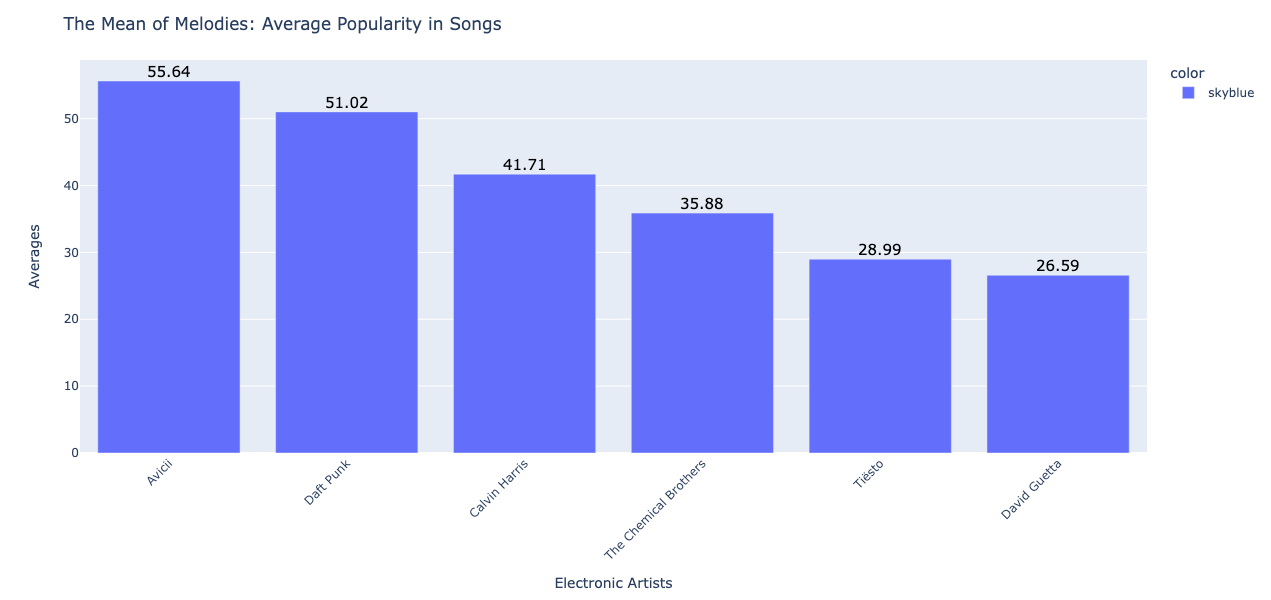

In [10]:
# Sort the average/mean values in descending order
sorted_mean_values_for_popularity = mean_values_of_features.sort_values('popularity',ascending=False)

print("Mean values of features sorted in descending order:")
print(sorted_mean_values_for_popularity['popularity'])


# Extracting the sorted mean values for 'popularity'
popularity_mean_sorted = sorted_mean_values_for_popularity['popularity']


# Define colors for the bars
colors = ['skyblue' if x != 'popularity' else 'salmon' for x in popularity_mean_sorted.index]

# Create a bar chart using the sorted mean values for 'popularity'
fig = px.bar(x=popularity_mean_sorted.index, y=popularity_mean_sorted, color=colors)

# Add labels and title
fig.update_layout(
    xaxis_title='Electronic Artists',
    yaxis_title='Averages',
    title='The Mean of Melodies: Average Popularity in Songs',
    xaxis_tickangle= -45,  # Rotate x-axis labels for better visibility
    height=600,  # Adjust the height of the chart
    width=1200    # Adjust the width of the chart
    
)

# Add labels for the percentage on top of each bar
for i, mean_value in enumerate(popularity_mean_sorted):
    fig.add_annotation(
        x=popularity_mean_sorted.index[i],
        y=mean_value,
        text=f'{mean_value:.2f}',
        font=dict(color='black', size=15), #change size of percentage
        showarrow=False,
        yshift=10 #change distance between bar and % number
    )

# Show plot
fig.show()

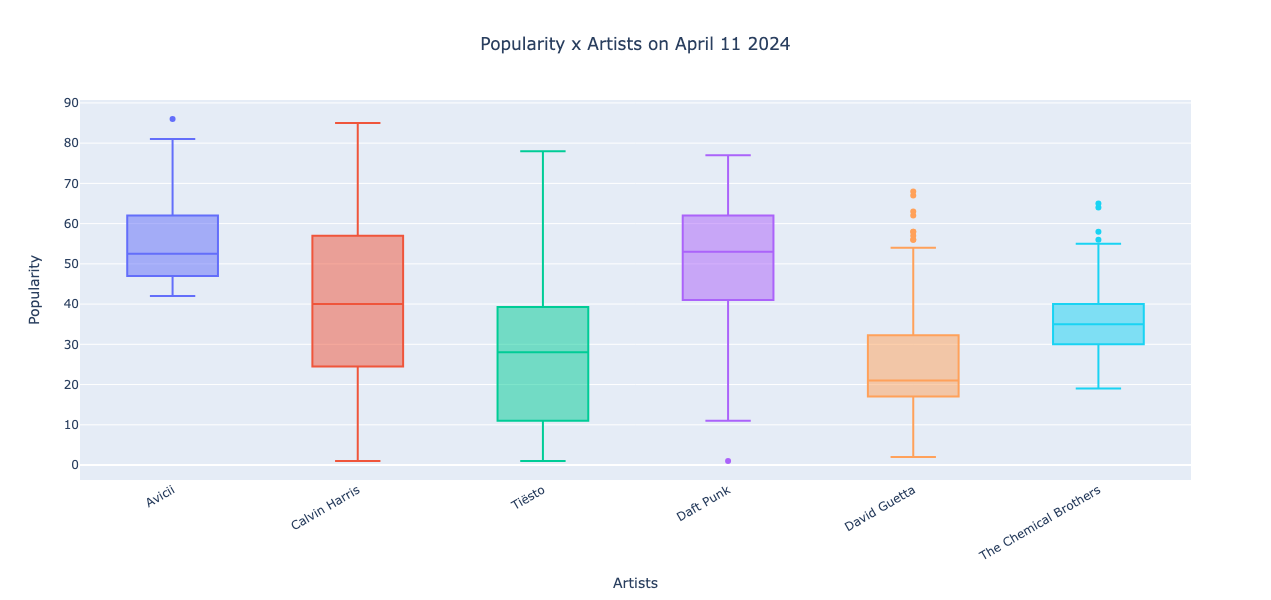

In [11]:
# Box plot
box_plot = px.box(df_unique, x='Artists', y='popularity', color='Artists',
                  title='Popularity x Artists on April 11 2024',
                  labels={'Artists': 'Artists', 'popularity': 'Popularity'}) # second is the label

# Update layout
box_plot.update_layout(
    showlegend=False, 
    height=600, 
    width=1200,  
    title_x=0.5  # Center title
)

# Rotate x-axis tick labels diagonally
box_plot.update_layout(
    xaxis=dict(
        tickangle=-30,
        tickmode='array',
        tickvals=list(range(len(df_unique['Artists'].unique()))),
        ticktext=list(df_unique['Artists'].unique())
    )
)

# Show the box plot
box_plot.show()

In [12]:
# Adding new column named, Genre
df_unique['Genre'] = 'Electronic'

# Export the DataFrame to a new CSV file
df_unique.to_csv('df_electronic_cleaned.csv', index=False)

In [13]:
# Select numerical columns
numerical_df= df_unique.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

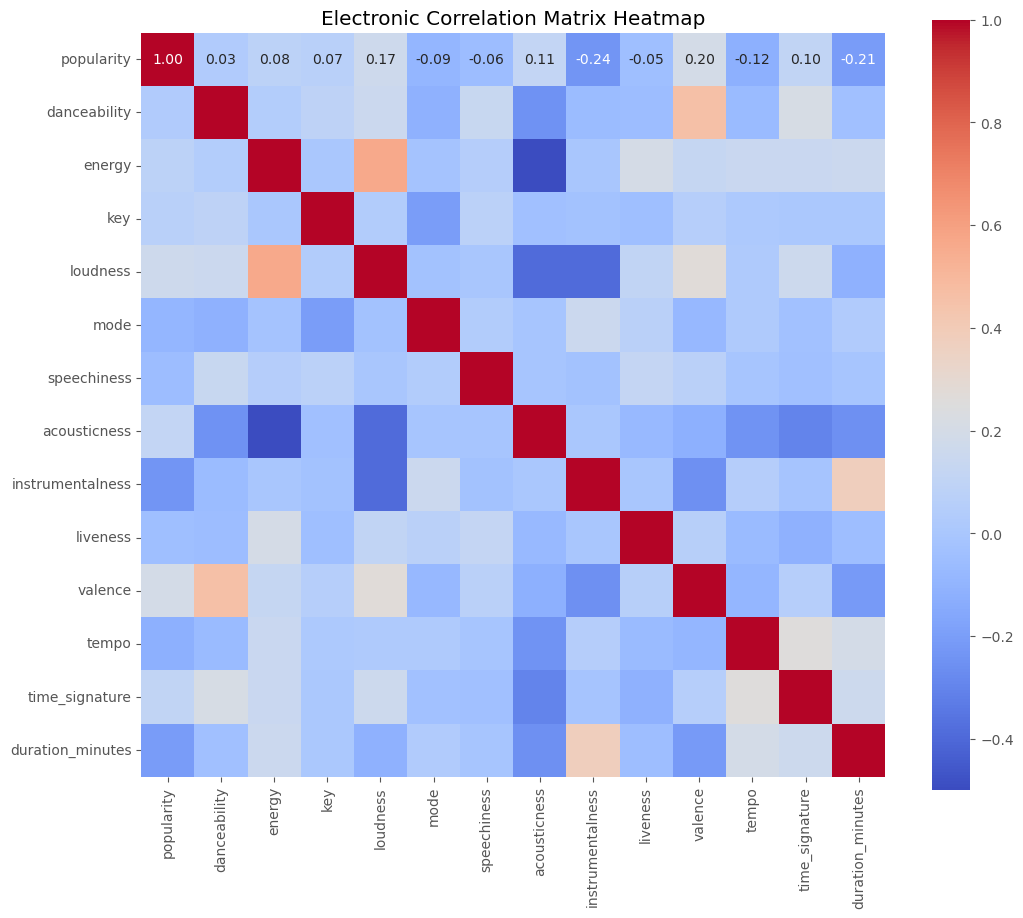

In [14]:
# Plot heatmap

# Create a new figure with a specified size (12 inches wide and 10 inches tall)
fig = plt.figure(figsize=(12, 10))

# Get the current Axes instance of the figure
ax = fig.gca()

# Plot the heatmap using seaborn's heatmap function
# correlation_matrix: the data to be plotted, assumed to be a correlation matrix
# annot=True: annotate each cell with the numeric value
# fmt=".2f": format for annotations, displaying two decimal places
# cmap='coolwarm': color map for the heatmap (cool to warm colors)
# ax=ax: plot the heatmap on the specified Axes instance
# annot_kws={"size": 10}: set the font size of the annotations to 10
# square=True: ensure the aspect ratio of the plot is square
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax, annot_kws={"size": 10}, square=True)

# Add a title to the plot
plt.title('Electronic Correlation Matrix Heatmap')

# Display the plot
plt.show()

In [15]:
# Create dummy variables for specified values in 'Artists'
key_name_dummies = pd.get_dummies(df_unique['Artists'], prefix='', prefix_sep='', columns=['Avicii', 'Daft Punk', 'Calvin Harris',
                                                                                           'The Chemical Brothers', 'David Guetta',
                                                                                           'Tiësto'], dtype='int')
# Concatenate the dummy variables with the original DataFrame
df_encoded = pd.concat([df_unique, key_name_dummies], axis=1)

df_encoded.shape

(504, 33)

- Model

In [16]:
import sklearn as skl
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Feature matrix and target vector respectively
X = df_encoded.select_dtypes(['float', 'int'])
y = df_encoded['popularity']

X = X.drop(columns=['popularity'])

# popularity is gone 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   danceability           504 non-null    float64
 1   energy                 504 non-null    float64
 2   key                    504 non-null    int64  
 3   loudness               504 non-null    float64
 4   mode                   504 non-null    int64  
 5   speechiness            504 non-null    float64
 6   acousticness           504 non-null    float64
 7   instrumentalness       504 non-null    float64
 8   liveness               504 non-null    float64
 9   valence                504 non-null    float64
 10  tempo                  504 non-null    float64
 11  time_signature         504 non-null    int64  
 12  Release Day            504 non-null    int32  
 13  Release Month          504 non-null    int32  
 14  Release Year           504 non-null    int32  
 15  durati

In [17]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a list of alpha values to try for Lasso and Ridge regression
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Store results
results = []

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_pred = linear_reg.predict(X_test_scaled)
linear_r2 = r2_score(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mape = np.mean(np.abs((y_test - linear_pred) / y_test)) * 100

results.append({
    'Model': 'Linear Regression',
    'R2 Score': linear_r2,
    'MSE': linear_mse,
    'MAPE': linear_mape
})

# Lasso Regression
for alpha in alpha_values:
    lasso = Lasso(alpha=0.1, max_iter=1000, random_state=42) 
    lasso.fit(X_train_scaled, y_train)
    lasso_pred = lasso.predict(X_test_scaled)
    lasso_r2 = r2_score(y_test, lasso_pred)
    lasso_mse = mean_squared_error(y_test, lasso_pred)
    lasso_mape = np.mean(np.abs((y_test - lasso_pred) / y_test)) * 100

    results.append({
        'Model': f'Lasso (alpha={alpha})',
        'R2 Score': lasso_r2,
        'MSE': lasso_mse,
        'MAPE': lasso_mape
    })

# Ridge Regression
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_pred = ridge.predict(X_test_scaled)
    ridge_r2 = r2_score(y_test, ridge_pred)
    ridge_mse = mean_squared_error(y_test, ridge_pred)
    ridge_mape = np.mean(np.abs((y_test - ridge_pred) / y_test)) * 100
    
    results.append({
        'Model': f'Ridge (alpha={alpha})',
        'R2 Score': ridge_r2,
        'MSE': ridge_mse,
        'MAPE': ridge_mape
    })


In [18]:
# Convert results to DataFrame for easier visualization
results_electronic_df_one = pd.DataFrame(results)

# Print results
print(results_electronic_df_one)

                  Model  R2 Score         MSE        MAPE
0     Linear Regression  0.433606  245.506257  118.812861
1   Lasso (alpha=0.001)  0.438139  243.541337  117.405742
2    Lasso (alpha=0.01)  0.438139  243.541337  117.405742
3     Lasso (alpha=0.1)  0.438139  243.541337  117.405742
4       Lasso (alpha=1)  0.438139  243.541337  117.405742
5      Lasso (alpha=10)  0.438139  243.541337  117.405742
6     Lasso (alpha=100)  0.438139  243.541337  117.405742
7   Ridge (alpha=0.001)  0.437315  243.898264  117.642486
8    Ridge (alpha=0.01)  0.437315  243.898223  117.641514
9     Ridge (alpha=0.1)  0.437316  243.897828  117.631794
10      Ridge (alpha=1)  0.437321  243.895628  117.535260
11     Ridge (alpha=10)  0.437003  244.033618  116.631641
12    Ridge (alpha=100)  0.415368  253.411239  121.006392


# Lasso

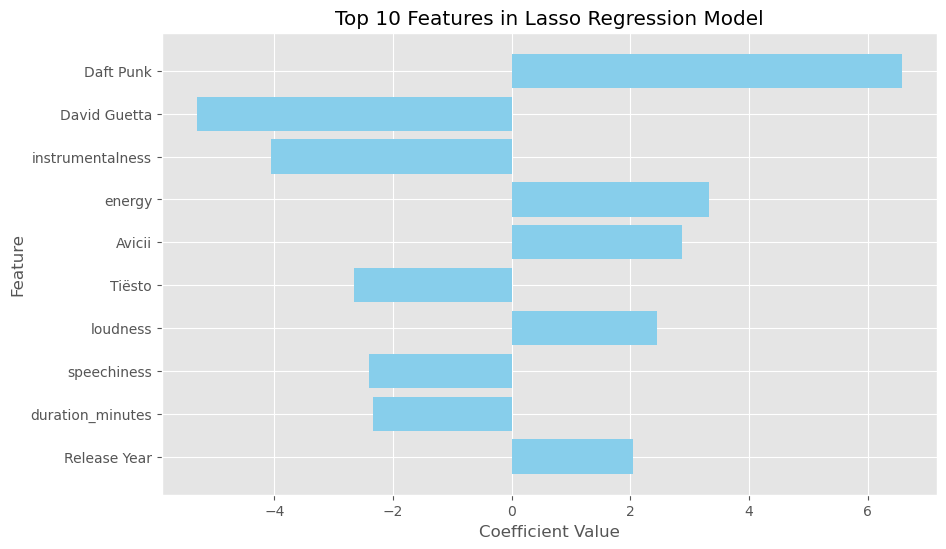

Test Score: 0.4381387172583747
MSE Score: 243.54133693364992


In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with StandardScaler and Lasso regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'lasso__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values to search over
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate test score
test_score = best_model.score(X_test, y_test)

# Get coefficients and corresponding feature names from best model
coefficients = best_model.named_steps['lasso'].coef_
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 coefficients
top_10_coefficients = coefficients_df.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_coefficients['Feature'], top_10_coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features in Lasso Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.show()

print("Test Score:", test_score)
y_pred = best_model.predict(X_test)

# Calculate MSE score
mse = mean_squared_error(y_test, y_pred)

# Print scores
print("MSE Score:", mse)

# Ridge

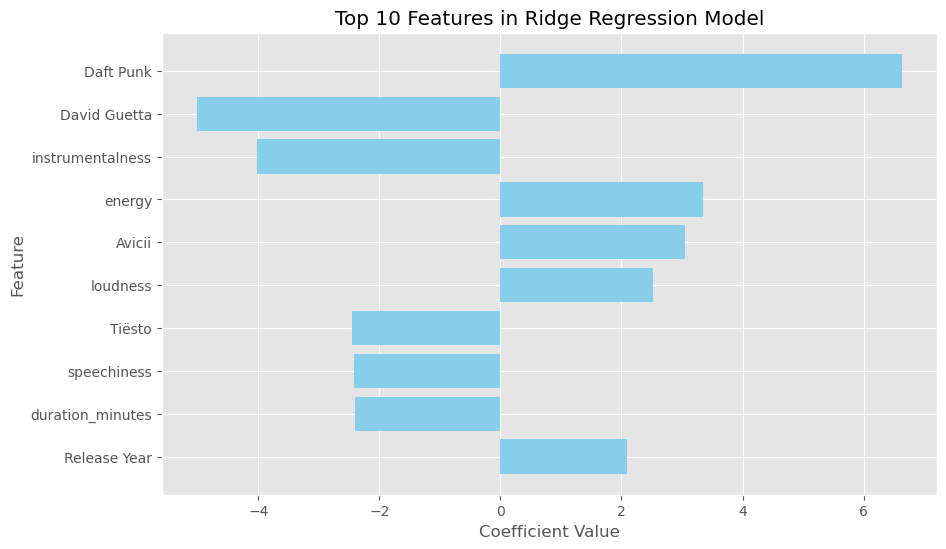

Test Score: 0.43700300141538573
MSE Score: 244.03361814838073


In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with StandardScaler and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values to search over
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate test score
test_score = best_model.score(X_test, y_test)

# Get coefficients and corresponding feature names from best model
coefficients = best_model.named_steps['ridge'].coef_
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 coefficients
top_10_coefficients = coefficients_df.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_coefficients['Feature'], top_10_coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features in Ridge Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.show()

print("Test Score:", test_score)
y_pred = best_model.predict(X_test)

# Calculate MSE score
mse = mean_squared_error(y_test, y_pred)

# Print scores
print("MSE Score:", mse)